In [12]:
%matplotlib notebook
# import mpld3
# mpld3.enable_notebook()

import pandas as pd
import os
import re
import sys
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
from math import *
import scipy
import numpy as np

import seaborn as sns
# from scipy import interpolate

from cycler import cycler

# plt.style.use('seaborn-whitegrid')
# plt.ion()
# plt.rcParams['figure.figsize'] = [10, 8]
# # params = {'legend.fontsize': 20,
# #           'legend.handlelength': 2}

# matplotlib.rc('font', **font)
# from pylab import rcParams

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# plt.rcParams['figure.figsize'] = [10, 8]

from matplotlib.lines import Line2D

from pylab import rcParams
plt.style.use('seaborn-whitegrid')
plt.ion()
# plt.rcParams['figure.figsize'] = [10, 8]
# params = {'legend.fontsize': 20,
#           'legend.handlelength': 2}

# fraction = 1.0
# width = 612 / 2
# fig_width_pt = width * fraction
# inches_per_pt = 1 / 72.27
# golden_ratio = (5**.5 - 1) / 2
ratio = 3/4
# Figure width in inches
fig_width_in = 5
# Figure height in inches
fig_height_in = fig_width_in * ratio

fig_dim = (fig_width_in, fig_height_in)

rcParams['figure.figsize'] = fig_dim
rcParams['lines.linewidth'] = 2

font = {'family' : 'monospace',
        'weight' : 'medium',
        'size'   : 10}
matplotlib.rc('font', **font)

rcParams.update({'figure.autolayout': True})

sns.color_palette("mako", as_cmap=True)

In [35]:
def load_tensorflow_results(path, filename_regex):
    files = [f for f in os.listdir(path) if re.match(filename_regex, f)]
#     print(files)
    progress_data = []
    for f in files:
#         d = os.path.join(path, f)
#         for f in os.listdir(d):
#         print('loading {}'.format(f))
        progress_filename = os.path.join(path, f, 'progress.csv')
        try:
            p = pd.read_csv(progress_filename)
            progress_data.append(p)
        except:
            pass
#     print('Loaded ' + str(len(progress_data)) + ' files.')
    # for p in progress_data:
    #     print(p.head())

    # reward mean / training_iteration (or timesteps_total)

    columns = {}
    for p in progress_data:
        for c in p.columns:
            columns[c] = c

    aggregated_columns = {}
    for column in columns.keys():
        df = pd.DataFrame()
        for i, p in enumerate(progress_data):
            df[i] = p[column]
        aggregated_columns[column] = df
#     print(columns)
    return progress_data, aggregated_columns

def smooth_aggregated_column(aggregated_column, window_size):
#     print('ws ', window_size)
    return aggregated_column.rolling(window=window_size,axis=0).mean()
    



#  (8,88,158),
#         (43,140,190),
#         (78,179,211),
#         (123,204,196),
#         (168,211,181),
#         (204,235,197),
#.q3-5{fill:rgb(152,78,163)} .Set1 .q4-5{fill:rgb(255,127,0)}

def hex_to_rgb(hex_string):
    hex_string = hex_string.strip().strip('#')
#     print('hs "{}"'.format(hex_string))
    return tuple(int(hex_string[i:i+2], 16) / 255.0 for i in (0, 2, 4))

# wp_colors = [hex_to_rgb(s) for s in ['#762a83','#9970ab','#c2a5cf','#a6dba0','#5aae61','#1b7837']]

# colors = [
#     (117/255.0,112/255.0,179/255.0),
#     (217/255.0,95/255.0,2/255.0),
#     (27/255.0,158/255.0,119/255.0),
#     (0,0,0),
#     ]

colors = list(sns.color_palette('colorblind'))
scale_colors = list(sns.color_palette('mako'))

# scale_colors = [hex_to_rgb(h) for h in 
# '''#003f5c
# 58508d
# bc5090
# ff6361
# ffa600'''.replace('#','').split('\n')]

# wp_colors = [(r/255.0,g/255.0,b/255.0) for r,g,b in [
#         (228,26,28),
#         (55,126,184),
#         (77,175,74),
#         (152,78,163),
#         (255,127,0),
#     ]]

def plot_quantiles(fig, ax, x, aggregated_column, color=(0,0,0), alpha=.15, quantile=.5):
#     plt.plot(x, aggregated_column.quantile(.5, 1), color=color)
    q1 = aggregated_column.quantile(.5-quantile/2, 1).values.tolist()
    q2 = aggregated_column.quantile(.5+quantile/2, 1).values.tolist()
#     print(type(q1), type(q2), type(x), .5-quantile/2, .5+quantile/2)
    ax.fill_between(x, q1, q2, color=(*color, alpha))

def plot_smooth_quantiles(x, aggregated_column, window_size=5, **kwargs):
    plot_quantiles(x, smooth_aggregated_column(aggregated_column, window_size), **kwargs)
    
def make_iteration_array(aggregated_columns):
    return aggregated_columns['time_total_s'].mean(1).values.tolist()

def plot_smooth_quantiles_by_iteration(aggregated_columns, column_name, **kwargs):
    if len(aggregated_columns) > 0:
        plot_smooth_quantiles(make_iteration_array(aggregated_columns), aggregated_columns[column_name], **kwargs)

def printColumns(aggregated_columns):
    pprint(aggregated_columns.keys())

def plot_range(fig, ax, times, perfs, color = (0,0,0), quantiles = [.75], alpha=.25, mark_ends=False):
    #[0.25, .5, .75, 1.0]
    for i, quantile in enumerate(quantiles):
        plot_quantiles(fig, ax, times, perfs, quantile=quantile, color=color, alpha=alpha)
        
    median = perfs.quantile(.5, 1)
    plt.plot(times, median, color =color, lw=1) # median
    if mark_ends:
#         print(common_times[-1], median[common_times[-1]])
        plt.plot(common_times[-1], median[common_times[-1]],'xk',label='nolegend') 
        
# results_path = '/home/ctripp/data/cavs/combined/'
# results_path = '/home/ctripp/hpc_results_revised/'
results_path = '/home/ctripp/project/cavs/data/v6/'

<IPython.core.display.Javascript object>


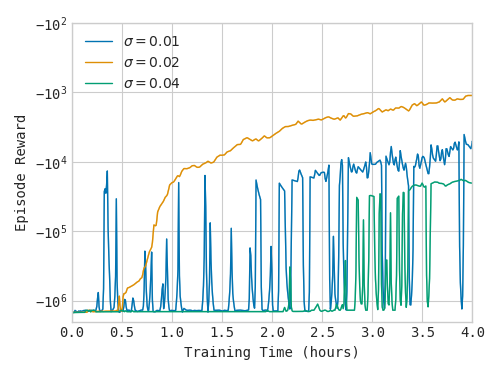

/home/ctripp/project/cavs/data/v6/ test_x5_noise_stdev_0_01_alpha_0_25_controller_none_.*
/home/ctripp/project/cavs/data/v6/ test_x5_noise_stdev_0_02_alpha_0_25_controller_none_.*
/home/ctripp/project/cavs/data/v6/ test_x5_noise_stdev_0_04_alpha_0_25_controller_none_.*


In [36]:
# tuning study

# print(sns.color_palette())
lc_datasets = [ 
    (r'$\sigma=0.01$', colors[0], r'test_x5_noise_stdev_0_01_alpha_0_25_controller_none_.*',),
    (r'$\sigma=0.02$', colors[1], r'test_x5_noise_stdev_0_02_alpha_0_25_controller_none_.*',),
    (r'$\sigma=0.04$', colors[2], r'test_x5_noise_stdev_0_04_alpha_0_25_controller_none_.*',),
    ]

fig, ax = plt.subplots()   

for label, color, pattern in lc_datasets:
    print(results_path, pattern)
    data, aggregated = load_tensorflow_results(results_path, pattern)
    times = aggregated['time_total_s']

    perfs = aggregated['info/best_reward_mean']
    common_times = np.linspace(0, 900*60, num=2000)
    common_perfs = pd.DataFrame(index=common_times)
    for i, run in enumerate(times.columns):
        common_perfs[run] = np.interp(common_times, times[run], perfs[run])
        
    plot_range(fig, ax, common_times / (60*60), common_perfs, color=color)

plt.legend([label for label, color, pattern in lc_datasets])
    
ax.set_ylim(-2e6,-1e2)
ax.set_xlim(0, 4)
ax.set_xlabel('Training Time (hours)')
ax.set_ylabel('Episode Reward')
ax.set_yscale('symlog')
plt.savefig('sigma_tuning.svg')


<IPython.core.display.Javascript object>


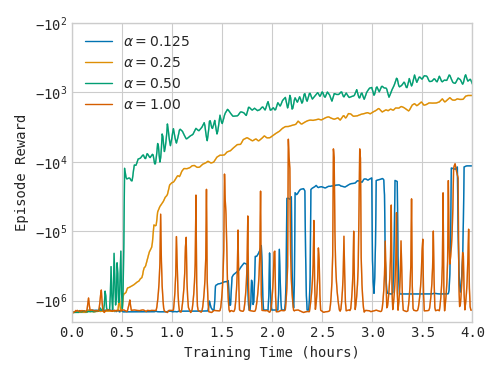

In [37]:

scale_colors = sns.color_palette('colorblind', n_colors=4)
lc_datasets = [ 
    (r'$\alpha=0.125$', scale_colors[0], r'test_x5_noise_stdev_0_02_alpha_0_124_controller_none_.*',),
    (r'$\alpha=0.25$', scale_colors[1], r'test_x5_noise_stdev_0_02_alpha_0_25_controller_none_.*',),
    (r'$\alpha=0.50$', scale_colors[2], r'test_x5_noise_stdev_0_02_alpha_0_5_controller_none_.*',),
    (r'$\alpha=1.00$', scale_colors[3], r'test_x5_noise_stdev_0_02_alpha_1_0_controller_none_.*',),
#     (r'$\alpha=2.0$', scale_colors[4], r'test_x5_noise_stdev_0_02_alpha_2_0_controller_none_.*',),
    ]

fig, ax = plt.subplots()   

for label, color, pattern in lc_datasets:
    data, aggregated = load_tensorflow_results(results_path, pattern)
    times = aggregated['time_total_s']

    perfs = aggregated['info/best_reward_mean']
    common_times = np.linspace(0, 900*60, num=2000)
    common_perfs = pd.DataFrame(index=common_times)
    for i, run in enumerate(times.columns):
        common_perfs[run] = np.interp(common_times, times[run], perfs[run])
        
    plot_range(fig, ax, common_times / (60*60), common_perfs, color=color)

plt.legend([label for label, color, pattern in lc_datasets])
    
ax.set_ylim(-2e6,-1e2)
ax.set_xlim(0, 4)
ax.set_xlabel('Training Time (hours)')
ax.set_ylabel('Episode Reward')
ax.set_yscale('symlog')
plt.savefig('alpha_tuning.svg')


<IPython.core.display.Javascript object>


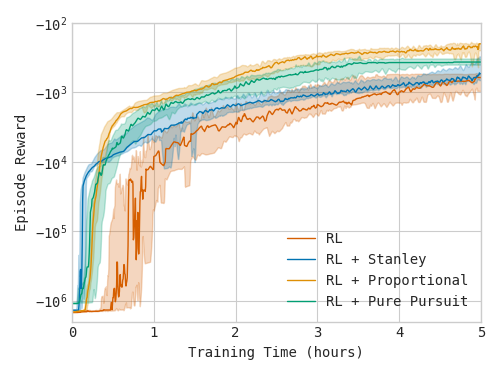

In [38]:

lc_datasets = [ 
    ('RL', colors[3], r'test_x22_noise_stdev_0_02_alpha_0_5_controller_none_use_controller_action_w_10_.*',),
    ('RL + Stanley', colors[0], r'test_x22_noise_stdev_0_02_alpha_0_5_controller_stanley_use_controller_action_w_10_tradeoff_0_005.*',),
    ('RL + Proportional', colors[1], r'test_x22_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_10_tradeoff_0_005.*',),
    ('RL + Pure Pursuit', colors[2], r'test_x22_noise_stdev_0_02_alpha_0_5_controller_pure_pursuit_use_controller_action_w_10_tradeoff_0_005.*',),    
    ]

# lc_datasets = [ 
#     ('RL', (0.0,0.0,0.0), r'test_x5_noise_stdev_0_02_alpha_0_25_controller_none_.*',),
#     ('RL + Stanley', (117/255.0,112/255.0,179/255.0), r'test_x8_noise_stdev_0_02_alpha_0_25_controller_stanley_use_controller_action_w_10_.*',),
#     ('RL + Proportional', (217/255.0,95/255.0,2/255.0), r'test_x8_noise_stdev_0_02_alpha_0_25_controller_pid_use_controller_action_w_10_.*',),
#     ('RL + Pure Pursuit', (27/255.0,158/255.0,119/255.0), r'test_x8_noise_stdev_0_02_alpha_0_25_controller_pure_pursuit_use_controller_action_w_10_.*',),    
#     ]
    
    
# fig, ax = plt.subplots(figsize=(9,7))   
fig, ax = plt.subplots()   

for label, color, pattern in lc_datasets:
    data, aggregated = load_tensorflow_results(results_path, pattern)
    times = aggregated['time_total_s']

    perfs = aggregated['info/best_reward_mean']
    common_times = np.linspace(0, 600*60, num=2000)
    common_perfs = pd.DataFrame(index=common_times)
    for i, run in enumerate(times.columns):
        common_perfs[run] = np.interp(common_times, times[run], perfs[run])
        
    plot_range(fig, ax, common_times / (60*60), common_perfs, color=color)

plt.legend([label for label, color, pattern in lc_datasets])
    
ax.set_ylim(-2e6,-1e2)
ax.set_xlim(0, 5.0)
ax.set_xlabel('Training Time (hours)')
ax.set_ylabel('Episode Reward')
ax.set_yscale('symlog')
plt.savefig('learning_curve_time.svg')


<IPython.core.display.Javascript object>


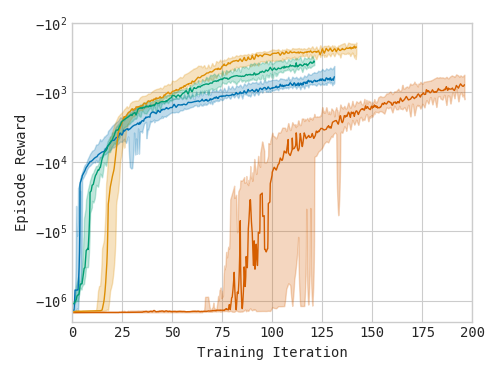

In [39]:
fig, ax = plt.subplots()   

for label, color, pattern in lc_datasets:
    data, aggregated = load_tensorflow_results(results_path, pattern)
    times = aggregated['training_iteration']
    perfs = aggregated['info/best_reward_mean']
    max_iter = times.max().min()
#     print(label)
#     pprint(max_iter)
#     printColumns(aggregated)
    common_times = np.linspace(0, max_iter, num=2000)
    common_perfs = pd.DataFrame(index=common_times)
    for i, run in enumerate(times.columns):
        common_perfs[run] = np.interp(common_times, times[run], perfs[run])
        
    plot_range(fig, ax, common_times, common_perfs, color=color)

# plt.legend([label for label, color, pattern in lc_datasets], loc='upperl left')
    
ax.set_ylim(-2e6,-1e2)
ax.set_xlim(0, 200)
ax.set_xlabel('Training Iteration')
ax.set_ylabel('Episode Reward')
ax.set_yscale('symlog')
fig.savefig('learning_curve_iteration.svg')


<IPython.core.display.Javascript object>


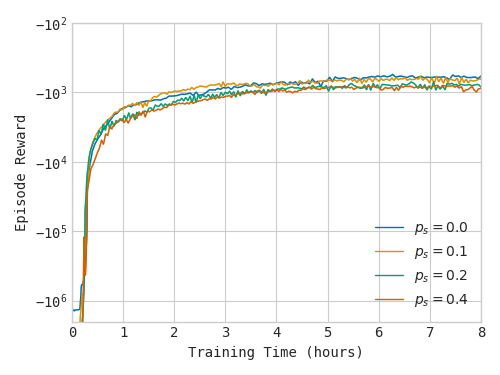

In [34]:
#+ Control effort penalty study (long, 1x)

scale_colors = sns.color_palette('colorblind', n_colors=4)

lc_datasets = [ 
#     (r'$\p_s=0.0$ $\p_a=0.0$', scale_colors[0], r'x23_noise_stdev_0_02_alpha_0_5_controller_pure_pursuit_use_controller_action_w_10_tradeoff_0_005.*',),
#     (r'$p_s=0.0$', scale_colors[-1], r'test_x23_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_10_steer_0_0_accel_0_01_tradeoff_0_005.*',),
    (r'$p_s=0.0$', scale_colors[0], r'test_x23_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_10_steer_0_0_accel_0_01_tradeoff_0_005.*',),
    (r'$p_s=0.1$', scale_colors[1], r'test_x23_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_10_steer_0_1_accel_0_01_tradeoff_0_005.*',),
    (r'$p_s=0.2$', scale_colors[2], r'test_x23_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_10_steer_0_2_accel_0_01_tradeoff_0_005.*',),
    (r'$p_s=0.4$', scale_colors[3], r'test_x23_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_10_steer_0_4_accel_0_01_tradeoff_0_005.*',),
    ]

fig, ax = plt.subplots()   

for label, color, pattern in lc_datasets:
    data, aggregated = load_tensorflow_results(results_path, pattern)
    times = aggregated['time_total_s']

    perfs = aggregated['info/best_reward_mean']
    common_times = np.linspace(0, 900*60, num=2000)
    common_perfs = pd.DataFrame(index=common_times)
    for i, run in enumerate(times.columns):
        common_perfs[run] = np.interp(common_times, times[run], perfs[run])
        
    plot_range(fig, ax, common_times / (60*60), common_perfs, color=color)

plt.legend([label for label, color, pattern in lc_datasets])
    
ax.set_ylim(-2e6,-1e2)
ax.set_xlim(0, 8)
ax.set_xlabel('Training Time (hours)')
ax.set_ylabel('Episode Reward')
ax.set_yscale('symlog')
plt.savefig('steering_penalty_tuning.svg')


<IPython.core.display.Javascript object>


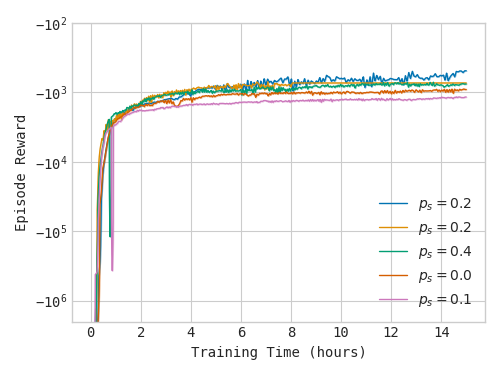

In [22]:
# + tradeoff study

scale_colors = sns.color_palette('colorblind', n_colors=5)

lc_datasets = [ 
#     (r'$\p_s=0.0$ $\p_a=0.0$', scale_colors[0], r'x23_noise_stdev_0_02_alpha_0_5_controller_pure_pursuit_use_controller_action_w_10_tradeoff_0_005.*',),
    
    (r'$p_s=0.2$', scale_colors[0], r'test_x24_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_10_steer_0_2_accel_0_01_tradeoff_0_0025_.*',),
    (r'$p_s=0.2$', scale_colors[1], r'test_x23_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_10_steer_0_2_accel_0_01_tradeoff_0_005_.*',),
    (r'$p_s=0.4$', scale_colors[2], r'test_x24_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_10_steer_0_2_accel_0_01_tradeoff_0_01_.*',),
    (r'$p_s=0.0$', scale_colors[3], r'test_x24_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_10_steer_0_2_accel_0_01_tradeoff_0_02_.*',),
    (r'$p_s=0.1$', scale_colors[4], r'test_x24_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_10_steer_0_2_accel_0_01_tradeoff_0_04_.*',),
    
    
    ]

fig, ax = plt.subplots()   

for label, color, pattern in lc_datasets:
    data, aggregated = load_tensorflow_results(results_path, pattern)
    times = aggregated['time_total_s']

    perfs = aggregated['info/best_reward_mean']
    common_times = np.linspace(0, 900*60, num=2000)
    common_perfs = pd.DataFrame(index=common_times)
    for i, run in enumerate(times.columns):
        common_perfs[run] = np.interp(common_times, times[run], perfs[run])
        
    plot_range(fig, ax, common_times / (60*60), common_perfs, color=color)

plt.legend([label for label, color, pattern in lc_datasets])
    
ax.set_ylim(-2e6,-1e2)
# ax.set_xlim(0, 8)
ax.set_xlabel('Training Time (hours)')
ax.set_ylabel('Episode Reward')
ax.set_yscale('symlog')
plt.savefig('steering_penalty_tuning.svg')


<IPython.core.display.Javascript object>


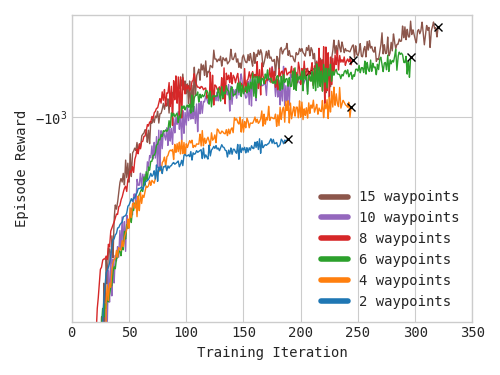

<IPython.core.display.Javascript object>


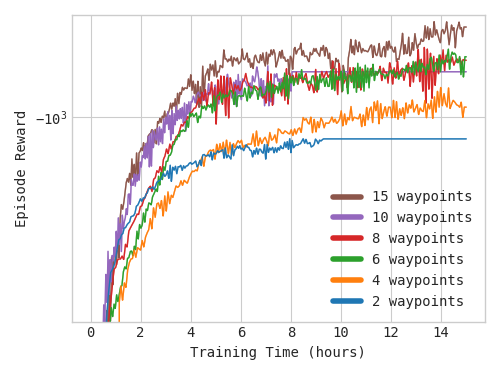

In [50]:

scale_colors = sns.color_palette('tab10', n_colors=6)

wp_datasets = [ 
#     ('{} waypoints'.format(i), wp_colors[int(i/2-1)], r'test_x8_noise_stdev_0_02_alpha_0_25_controller_pure_pursuit_use_controller_action_w_{}_.*'.format(i),)
#     ('{} waypoints'.format(w), wp_colors[i], r'test_x25_noise_stdev_0_02_alpha_0_5_controller_pure_pursuit_use_controller_action_w_{}_steer_0_2_accel_0_01_tradeoff_0_005.*'.format(w),)
    ('{} waypoints'.format(w), scale_colors[i], r'test_x\d+_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_{}_steer_0_2_accel_0_01_tradeoff_0_005.*'.format(w),)
    for i, w in enumerate([2,4,6,8,10,15])]

wp_datasets= list(reversed(wp_datasets))

fig, ax = plt.subplots()   

for label, color, pattern in wp_datasets:
#     print('l {} p {}'.format(label, pattern))
    data, aggregated = load_tensorflow_results(results_path, pattern)
#     print(aggregated.keys())
    times = aggregated['training_iteration']
    perfs = aggregated['info/best_reward_mean']
    max_iter = times.max().max()
    common_times = np.linspace(0, max_iter, num=2000)
    common_perfs = pd.DataFrame(index=common_times)
    for i, run in enumerate(times.columns):
        common_perfs[run] = np.interp(common_times, times[run], perfs[run])
        
    plot_range(fig, ax, common_times, common_perfs, color=color, alpha=.0, mark_ends=True)
    

    

ax.legend(
    [Line2D([0], [0], color=color, lw=4) for label, color, pattern in wp_datasets], 
    [label for label, color, pattern in wp_datasets])
    

ax.set_xlim(0, 350)
ax.set_xlabel('Training Iteration')
ax.set_ylabel('Episode Reward')
ax.set_yscale('symlog')
ax.set_ylim(-4e3,-5e2)
fig.savefig('learning_curve_waypoints_iteration.svg')



fig, ax = plt.subplots()   

for label, color, pattern in wp_datasets:
#     print('l {} p {}'.format(label, pattern))
    data, aggregated = load_tensorflow_results(results_path, pattern)
#     print(aggregated.keys())
    times = aggregated['time_total_s']
    common_times = np.linspace(0, 900*60, num=2000)
    perfs = aggregated['info/best_reward_mean']
    max_iter = times.max().max()
    common_perfs = pd.DataFrame(index=common_times)
    for i, run in enumerate(times.columns):
        common_perfs[run] = np.interp(common_times, times[run], perfs[run])
        
    plot_range(fig, ax, common_times / (60*60), common_perfs, color=color)
    

    

ax.legend(
    [Line2D([0], [0], color=color, lw=4) for label, color, pattern in wp_datasets], 
    [label for label, color, pattern in wp_datasets])
    

# ax.set_xlim(0, 400)
ax.set_xlabel('Training Time (hours)')
ax.set_ylabel('Episode Reward')
ax.set_yscale('symlog')
ax.set_ylim(-4e3,-5e2)

fig.savefig('learning_curve_waypoints_time.svg')


# wp_datasets = [ 
# #     ('{} waypoints'.format(i), wp_colors[int(i/2-1)], r'test_x8_noise_stdev_0_02_alpha_0_25_controller_pure_pursuit_use_controller_action_w_{}_.*'.format(i),)
# #     ('{} waypoints'.format(w), wp_colors[i], r'test_x25_noise_stdev_0_02_alpha_0_5_controller_pure_pursuit_use_controller_action_w_{}_steer_0_2_accel_0_01_tradeoff_0_005.*'.format(w),)
#     ('{} waypoints'.format(w), scale_colors[i], r'test_x\d+_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_{}_steer_0_2_accel_0_01_tradeoff_0_005.*'.format(w),)
#     for i, w in enumerate([2,4,6,8,10,15])]

# fig, ax = plt.subplots()   

# for label, color, pattern in wp_datasets:
# #     print('l {} p {}'.format(label, pattern))
#     data, aggregated = load_tensorflow_results(results_path, pattern)
# #     print(aggregated.keys())
#     times = aggregated['time_total_s']
#     perfs = aggregated['info/best_reward_mean']
#     common_times = np.linspace(0, 900*60, num=2000)    
# #     max_iter = times.max().max()
#     common_perfs = pd.DataFrame(index=common_times)
#     for i, run in enumerate(times.columns):
#         common_perfs[run] = np.interp(common_times, times[run], perfs[run])
        
# #     plot_range(fig, ax, common_times, common_perfs, color=color, alpha=.0)
#     plot_range(fig, ax, common_times / (60*60), common_perfs, color=color)

# plt.legend([label for label, color, pattern in wp_datasets])
    

# # ax.set_xlim(0, 400)
# ax.set_xlabel('Training Time (hours)')
# ax.set_ylabel('Episode Reward')
# ax.set_yscale('symlog')
# ax.set_ylim(-2e5,-5e2)
# fig.savefig('learning_curve_waypoints_iteration.svg')




<IPython.core.display.Javascript object>


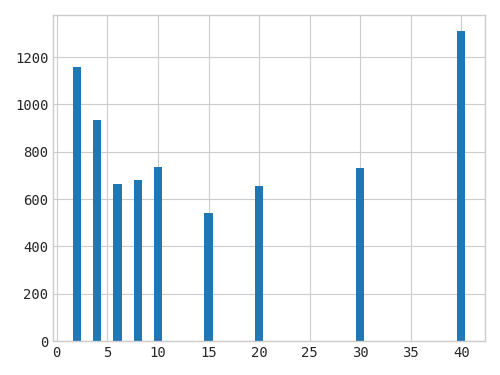

<BarContainer object of 9 artists>

In [24]:

# ('{} waypoints'.format(w), wp_colors[i], r'test_x(25|23)_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_{}_steer_0_2_accel_0_01_tradeoff_0_005.*'.format(w),)
wp_datasets = [ 
#     ('{} waypoints'.format(i), wp_colors[int(i/2-1)], r'test_x8_noise_stdev_0_02_alpha_0_25_controller_pure_pursuit_use_controller_action_w_{}_.*'.format(i),)
    (i, w, '{} waypoints'.format(w), r'test_x(25|23)_noise_stdev_0_02_alpha_0_5_controller_pid_use_controller_action_w_{}_steer_0_2_accel_0_01_tradeoff_0_005.*'.format(w),)
    for i, w in enumerate(reversed([40,30,20,15,10,8,6,4,2]))]



labels = []
perfs = []
for i, w, label, pattern in wp_datasets:
    data, aggregated = load_tensorflow_results(results_path, pattern)
    times = aggregated['training_iteration']
    max_iter = times[0].max()
#     print('max {} {}'.format(label, max_iter))
    perf = aggregated['info/best_reward_mean'][0][max_iter-1]
    labels.append(w)
    perfs.append(-perf)

fig, ax = plt.subplots()   

ax.bar(labels, perfs)
#     common_times = np.linspace(0, max_iter, num=2000)
#     common_perfs = pd.DataFrame(index=common_times)
#     for i, run in enumerate(times.columns):
#         common_perfs[run] = np.interp(common_times, times[run], perfs[run])
        
#     plot_range(fig, ax, common_times, common_perfs, color=color, alpha=.0)

# plt.legend([label for label, color, pattern in wp_datasets])
    
# ax.set_ylim(-2e6,-5e2)
# ax.set_xlim(0, 400)
# ax.set_xlabel('Training Iteration')
# ax.set_ylabel('Episode Reward')
# ax.set_yscale('symlog')
# fig.savefig('learning_curve_waypoints_iteration.svg')